pre-treated values :
CX 999 :  306 
CY 999 :  306 
minus CX :  83 
minus CY :  0

 
post-treated values :
CX 999 :  0 
CY 999 :  0 
minus CX :  7 
minus CY :  0


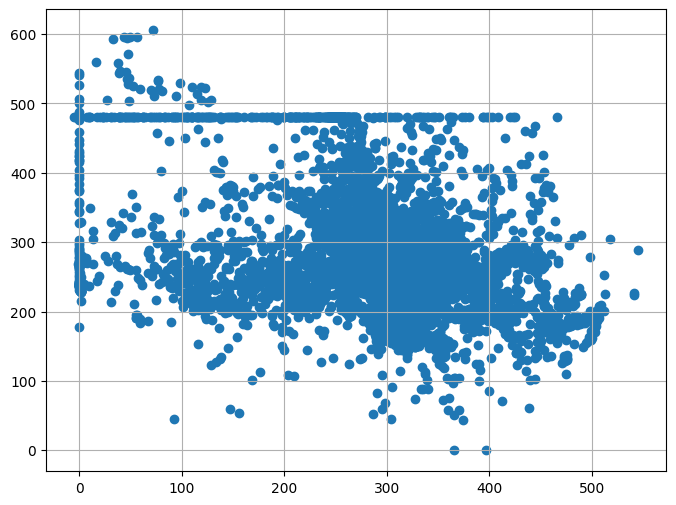

CY
480.0    378
263.6     20
253.5     17
262.9     17
258.4     17
        ... 
513.6      1
544.3      1
546.2      1
527.5      1
139.1      1
Name: count, Length: 2560, dtype: int64


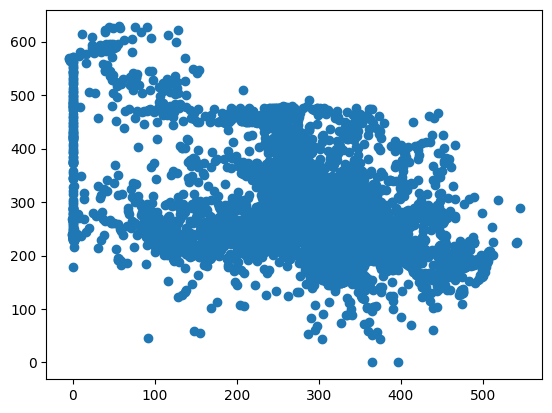

CX
0.000000      129
325.000000     30
326.900000     26
322.500000     23
325.100000     22
             ... 
443.300000      1
117.800000      1
16.800000       1
9.666305        1
3.400000        1
Name: count, Length: 2917, dtype: int64
CX
325.000000    30
326.900000    26
322.500000    23
325.100000    22
308.400000    22
              ..
0.172084       1
0.206172       1
0.242923       1
0.282234       1
3.400000       1
Name: count, Length: 3045, dtype: int64


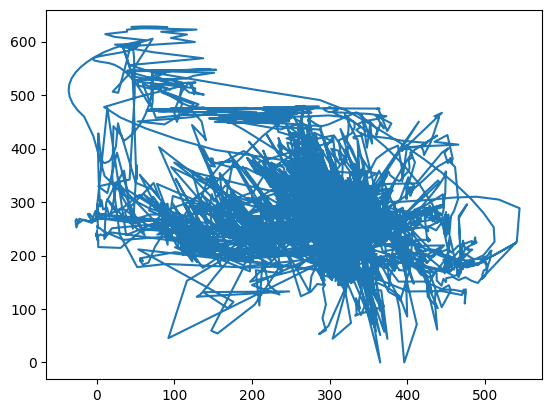

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('20230711-115250.csv')

CX = data[data['CX'] == 999.0].count()['CX']
CY = data[data['CY'] == 999.0].count()['CY']
minusX = data[data['CX'] < 0 ].count()['CX']
minusY = data[data['CY'] < 0 ].count()['CY']
print('pre-treated values :')
print('CX 999 : ',CX,'\nCY 999 : ', CY ,'\nminus CX : ', minusX, '\nminus CY : ',minusY)

data[['CX','CY']] = data[['CX','CY']].replace(999.0, np.nan)
data['CX'] = data['CX'].mask(data['CX'] < 0, np.nan)
data['CY'] = data['CY'].mask(data['CY'] < 0, np.nan)

data[['CX','CY']] = data[['CX','CY']].interpolate(method = 'akima')

nCX = data[data['CX'] == 999.0].count()['CX']
nCY = data[data['CY'] == 999.0].count()['CY']
nminusX = data[data['CX'] < 0 ].count()['CX']
nminusY = data[data['CY'] < 0 ].count()['CY']

print('\n \npost-treated values :')
print('CX 999 : ',nCX,'\nCY 999 : ', nCY ,'\nminus CX : ', nminusX, '\nminus CY : ',nminusY)

fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(data['CX'],data['CY'])
ax.grid(True)
plt.show()

print(data['CY'].value_counts())
data['CY'] = data['CY'].replace(480.0, np.nan)
data['CY'] = data['CY'].interpolate(method = 'akima')

plt.scatter(data['CX'],data['CY'])
plt.show()


print(data['CX'].value_counts())
data['CX'] = data['CX'].replace(0.0 , np.nan)
data['CX'] = data['CX'].interpolate(method = 'akima')
print(data['CX'].value_counts())
plt.plot(data['CX'],data['CY'])
plt.show()

CY
480.0    378
263.6     20
253.5     17
262.9     17
258.4     17
        ... 
513.6      1
544.3      1
546.2      1
527.5      1
139.1      1
Name: count, Length: 2560, dtype: int64


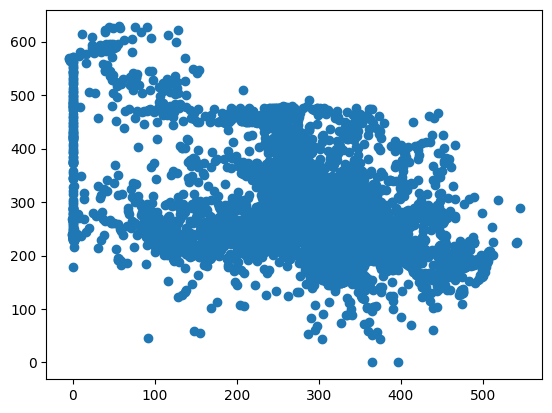

In [6]:
print(data['CY'].value_counts())
data['CY'] = data['CY'].replace(480.0, np.nan)
data['CY'] = data['CY'].interpolate(method = 'akima')

plt.scatter(data['CX'],data['CY'])

CX
0.000000      129
325.000000     30
326.900000     26
322.500000     23
325.100000     22
             ... 
443.300000      1
117.800000      1
16.800000       1
9.666305        1
3.400000        1
Name: count, Length: 2917, dtype: int64
CX
325.000000    30
326.900000    26
322.500000    23
325.100000    22
308.400000    22
              ..
0.172084       1
0.206172       1
0.242923       1
0.282234       1
3.400000       1
Name: count, Length: 3045, dtype: int64


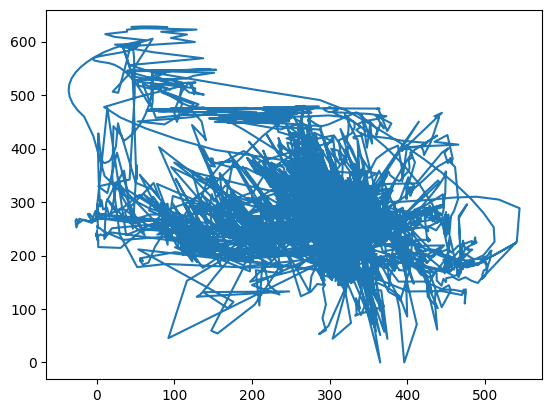

In [7]:
print(data['CX'].value_counts())
data['CX'] = data['CX'].replace(0.0 , np.nan)
data['CX'] = data['CX'].interpolate(method = 'akima')
print(data['CX'].value_counts())
plt.plot(data['CX'],data['CY'])